In [ ]:
NAME = "Rebeca M Mendez Planchart"
COLLABORATORS = ""

---

# CS110 Assignment 3 - Trie trees

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1) on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

For details on how to create a nice PDF from a Jupyter notebook, refer again to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1).

### HCs and LOs for this assignment
[#responsibility], [#PythonProgramming], [#CodeReadability], [#DataStructures], [#ComplexityAnalysis], [#ComputationalCritique]

## Question 0

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 10 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.

## Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you go about developing an algorithmic strategy from scratch to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build a very simple auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones we have discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:

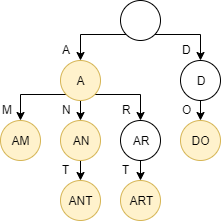

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1: Implement a trie tree

In this question, you will write Python code that can take a set/list/tuple of strings and insert them into a trie tree and lookup whether a specific word/string is present in the trie tree.

### Q1a: Theoretical pondering

Two main approaches to building trees, you might recall from class, are making separate Tree and Node classes, or only making a Node class. Which method do you think is a better fit for trie trees, and why? **Justify your reasoning in around 100 words.** You will use your chosen approach throughout the assignment, so don't rush this question.



Even when both approaches work, using two separate classes has the two big advantages of treating each node as its own object, thus allowing the inclusion of attributes for each node (in this case, each character), and it allows for more efficient maintenance of the structure regardless of the input.
Being able to treat each character as their own object allows the inclusion of attributes that will facilitate the implementation (and readability of the code), like the children of the node and instead of needing to add an extra node signaling the end of the word (i.e., the color of the node in the overview), the node itself can have the attribute indicating the need of the word. It also facilitates the addition of new attributes if they are necessary for a new method in the trie class.
Because we are dealing with characters depending on other characters, the best way to store them is in dictionaries, which means that the root will need to also be stored in a dictionary. If we only deal with a single class, the manipulation of the root would need to be done there, meaning we will need to be especially careful of adding some sentinel value to guarantee the running of the code, and because it depends on the structure of the other nodes if you wanted to add extra attributes, depending on how it's implemented it could affect the whole code. On the other hand, having the root in the Trie class guarantees that the function can always be called (even if no nodes are inserted), and the structure of the tree will remain (even if we manipulate the node class). However, as a drawback, this approach of two classes can take more memory (given the stored information for each node).



### Q1b: Practical implementation

In the two cells below, there are two code skeletons. Depending on your answer to Q1a, either **implement a Node and a Trie class** or **implement a Node class**. Choose the corresponding code cell and delete the other one.

For your class(es), write **insert()** and **lookup()** methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.

If you are coding two classes, your Trie should, upon initiation, create the root Node. If you are coding a single class, use an attribute to mark the root node.

Finally, make sure that the trie can be **initiated with a wordbank as an input**. This means that a user can create a trie and feed it an initial dictionary of words at the same time (like in the tests below), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your \_\_init\_\_() has to make some calls to your insert() method.

Several test cases have been provided for your convenience and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. In addition, create at least **three more tests** to demonstrate that your code is working correctly and justify why such test cases are appropriate.

In [1]:
# VERSION 1 - Node + Trie classes

#Idea for the search and insertion inspired by pseudocode in (Vipul Gupta, 2019)


class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    character= The letter of the node
    children = all teh children of the node (dictionary)
    color = determines if it's the end of the word
    """

    def __init__(self, character):
        #Transforms the character into a node
        self.character = character
        #The children are stored in a dictionary
        self.children = {}
        #as in the overview the color of the node determins if it's the end of the word
        #Black - Not the end of the word
        #Yellow = end of the word
        self.color = "Black"
        #raise NotImplementedError()
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    root = first node in the tree
    word_list = list of words that will initiate the tree

    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """

        #Need to create an empty node for the root
        self.root = Node("")
        #Deals with an empty word to avoid errors
        self.root.color = "Yellow"
        #Beacuse The code creates objects we can just change the attribute of the root
        #to easily deal with especial cases
        #treats the root as it's own word
        #To identify a word regardless of the case avoiding case problem
        self.word_list = [word.lower() for word in word_list]
        #Assumes the imput will be a list of words
        #pass each word from the list to be inserted
        for word in self.word_list:
            self.insert(word)
        #raise NotImplementedError()
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        #marks the current node
        current_node = self.root
        #cheacks each character of the word
        for character in word:
            #If the character is not already one of the childre it creates the node
            if character not in current_node.children:
                #pass the character as a child node of the current character
                current_node.children[character] = Node(character)
            #If it was already in itonly opdate current node
            current_node = current_node.children[character]
        #marks the final node of the word as the end of the word/ chnage color
        current_node.color = "Yellow"
        #raise NotImplementedError()
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        #avaoiding problems with the case of the word
        #making teh case consistent with the word_list
        word = word.lower()
        #starts looking at the root
        current_node = self.root
        #checks each character of the word
        for character in word:
            #return found if it's not a children
            if character not in current_node.children:
                return False
            #updates the current node
            current_node = current_node.children[character]
            #print("current_node",current_node.color)
        #Checks the color of the last node to determine if teh wrd exists
        #If the last character yellow return True
        if current_node.color == "Yellow":
            return True
        #If black return false 
        #Even if the word is a prifix of another it was never added as a full word
        else:
            return False
        #raise NotImplementedError()

# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as to justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie(wordbank)
# be careful about capital letters!
assert trie.lookup('oiolossëo') == True
# this is a prefix, but also a word in itself
assert trie.lookup('an') == True
# this is a prefix, but NOT a word
assert trie.lookup('ele') == False
# not in the wordbank
assert trie.lookup('Mithrandir') == False

# Note: There are several ways in which we can condense the text cleaning syntax, 
# without repeating the method replace() multiple times, 
# but we are leaving it this way for clarity.

In [27]:
# VERSION  2 - Node 

#Used version 1

In [4]:
#Test 1
#Check for an empty word, that should be present to account for the root
assert trie.lookup("") == True

#Test 2
#Check if new words can be added without eliminating the\
#imput of the word bank use for the inizalization
trie.insert("dog")
assert trie.lookup("dog") == True
assert trie.lookup("súrinen") == True

#Test 3 
#Look for a word before inserting it into the trie an afetr inserting it
assert trie.lookup("test") == False
trie.insert("test")
assert trie.lookup("test") == True

#Test 4 
#Look for a word that it's in the tree, without the especial symbol i.e, it's not excaty the word
#Meaning our tree should account for the especial symbols of the letters
assert trie.lookup("ilye") == False
#original -> "ilyë"

#Test 5
#Checks that even initializing the trie with an empty list, we would abotian true for an empty character because the 
#use of two clases preserves the structure of the tree by dealing seperatly with the root.
trie = Trie([])
assert trie.lookup("") == True


#Only created to go back to wordbank allowing repetition of the test cell withput needing to 
#rerun the trie tree
trie = Trie(wordbank)

#### Justification for the the tests
The addition of the new tests checks for all the other possible causes and functionality of the methods. The first one checks for an empty word, a case that was especially tough thru because it represents the "character" of the root node (being able to easily change the attributes of a specific node is one of the advantages of having two classes). The second and third tests deal with the insertion function; because the tree is already initialized, we can add new words using the insert method; the second test checks that after inserting a new word, the original words used to initialize the tree weren't impacted, while the third one checks that the lookup function only recognizes the word after actually being inserted. The fourth test finally checks for the special character of the word, assuming that a special character signifies a different word (i.e., the word would be in the tree if it had the special character). The fifth and final test checks the condition of the root again, but when the tree was initialized with an empty list.

In combination with the original tests, these tests represent all the possible cases that the trie tree can handle (with the created functions). 

## Q2: The computational complexity of tries

Evaluate the **computational complexity of the insert() and lookup()** methods in a trie. What are the relevant variables for runtime? You might want to consider how the height of a trie is computed to start addressing this question.  Make sure to clearly explain your reasoning.

**Compare your results to** the runtime of the same operations on **a BST**. Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. If you believe such circumstances could be common, why would someone even bother implementing a trie tree?



As we see, both functions need to transverse at least the length of the whole word when inserting (convert each character into a node) and when we look (guarantee that the final node represents a valid word and not only a prefix). Both of them evaluate the children of the root and determine if the first character of the word matches, then it continues down until it has the whole word or returns False. The difference between the two is that the insert method converts the missing characters into nodes (we are going to assume it takes constant time), while search has to iterate through the existing children of the root to determine if the word is the trie. In the worst-case, both functions would need to transverse thru the length of the word to determine if its actually in the tree, leading to the time complexity of O(L), where L is the length of the said word (i.e., doesn't need to iterate thru the whole tree because only care about a perfect match, and all the words in a child start with the same character). In terms of memory, the search operation only takes O(1), which is the requirement of searching (but no new elements are added), while inserting could take a memory of O(L) if none of the characters of the word were already added to the tree. 

The time complexity for the same operations in a BST is O(h), where the h is the height of the tree or more commonly O (log n) for balanced trees where n is the number of elements in the tree. This leads us to think that as long as the length of the word we are trying to insert or lookup is less than the log of the total number of elements in the tree (or the height in unbalanced trees), the operations in the trie will be significantly faster. Because the time complexity of tries depends on the length of the word in comparison with the total number of elements in the tree (BST), the difference in time complexities will be more evident the more elements the tree has, dramatically increasing the time of the BST but not of the trie. 


## Q3: Print a dictionary in alphabetical order.

Recall the meaning of pre-order traversal from your previous classes. On the data structure of a trie tree, pre-order traversal corresponds to an alphabetically sorted list of the words contained within (provided that your node children are sorted alphabetically).

For example, on the example trie given in the introduction, pre-order traversal would return ["A", "AM, "AN", "ANT", "AR, "ART, "D" and "DO"]. However, since we are only interested in the actual words, we would not include "D" and "AR" in our list. To that end, you will need to include an attribute for each node, storing the information about whether its content is a word or not.

Copy your existing code to the code skeleton cell below, and add a new method to it, **alphabetical_list()**. This will be version two of your autocomplete script.

The method should **return a list**, whose elements will be the words contained in the tree, in alphabetical order. On top of passing the provided test, write at least **three more tests**, and explain why they are appropriate.

**Approach choice:** Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. **Justify your choice of approach** in a few sentences (~100 words).

Copy-paste your previous code and make adjustments to this "new version", so that you cannot break the old one :).

*(Notes: If you choose a recursive approach, it might be useful to implement a helper method that is not called by the user but by preorder_traversal(). Also, watch out for the [unintuitive Python behaviour](https://web.archive.org/web/20200221224620/http://effbot.org/zone/default-values.htm) if defining functions with mutable default parameter values.)*

In [338]:
# depending on your choice of approach,
# add the method either to the Node or the Trie class.

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    character= The letter of the node
    children = all teh children of the node (dictionary)
    color = determines if it's the end of the word
    """

    def __init__(self, character):
        #Transforms the character into a node
        self.character = character
        #The children are stored in a dictionary
        self.children = {}
        #as in the overview the color of the node determins if it's the end of the word
        #Black - Not the end of the word
        #Yellow = end of the word
        self.color = "Black"
        #raise NotImplementedError()
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    root = first node in the tree
    word_list = list of words that will initiate the tree
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    alphabetical_list(self):
        Prints all the words in the trie in alphabetical order
    """
    
    def __init__(self, word_list):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        #Need to create an empty node for the root
        self.root = Node("")
        #Deals with an empty word to avoid errors
        self.root.color = "Yellow"
        #Beacuse The code creates objects we can just change the attribute of the root
        #to easily deal with especial cases
        #treats the root as it's own word
        #To identify a word regardless of the case avoiding case problem
        self.word_list = [word.lower() for word in word_list]
        #Assumes the imput will be a list of words
        #pass each word from the list to be inserted
        for word in self.word_list:
            self.insert(word)
        #raise NotImplementedError()
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        #marks the current node
        current_node = self.root
        #cheacks each character of the word
        for character in word:
            #If the character is not already one of the childre it creates the node
            if character not in current_node.children:
                #pass the character as a child node of the current character
                current_node.children[character] = Node(character)
            #If it was already in itonly opdate current node
            current_node = current_node.children[character]
        #marks the final node of the word as the end of the word/ chnage color
        current_node.color = "Yellow"
        #raise NotImplementedError()
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        #avaoiding problems with the case of the word
        #making teh case consistent with the word_list
        word = word.lower()
        #starts looking at the root
        current_node = self.root
        #checks each character of the word
        for character in word:
            #return found if it's not a children
            if character not in current_node.children:
                return False
            #updates the current node
            current_node = current_node.children[character]
            #print("current_node",current_node.color)
        #Checks the color of the last node to determine if teh wrd exists
        #If the last character yellow return True
        if current_node.color == "Yellow":
            return True
        #If black return false 
        #Even if the word is a prifix of another it was never added as a full word
        else:
            return False
        #raise NotImplementedError()


    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        #Given the structure of the code (requiring an input not necesary to count for non children)
        
        first_letters = [ i for i in self.root.children]
        #first_letters.sort()
        #print(first_letters)
        lst = []
    
       

            #for i in range(len(first_letters)):
             
        #Transversal code modified from (Trie implementation :: AlgoTree, 2019)
                
        def preorder_traversal(node, start, end):
                
            #determind if it's the end of the word
            if node.color == "Yellow":
                lst.append(start + end)
                    
            #transverse thru the tree
            for letter in node.children:
                #holds the end of the word to be updated on each iteration
                hold = end
                #updates the end of the word appending the new letter
                #varaible need to be created tomantain the order of letters
                hold += letter
                #print(hold)
                #creates the child node, to perform the recurssion
                child = node.children[letter]
            
                #call the function to iterate thru the tree
                preorder_traversal(child, start, hold)
                
        for i in first_letters:
                #print(i)
            preorder_traversal(self.root.children[i], i, "")
        
        lst.sort()
        return lst

       # raise NotImplementedError()

In [339]:
# intiate the test by uncommenting one of the lines below, depending on your approach

wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").replace(".", "").split()

trie = Trie(wordbank)
#trie = Node(wordbank)

#print(trie.alphabetical_list())

#print()

test = trie.alphabetical_list() 

assert trie.alphabetical_list() == ['a','ad','adipiscing','amet','aptent',
                                    'class','consectetuer','conubia',
                                    'curabitur','dapibus','dolor','duis',
                                    'elit','etiam','facilisis','hymenaeos',
                                    'inceptos','ipsum','ligula','litora',
                                    'lorem','mi','nostra','nunc','per',
                                    'pulvinar','quam','quis','sapien',
                                    'sit','sociosqu','sollicitudin','taciti',
                                    'torquent','tortor','vel','vestibulum']



#print (len(ori), len(test))

        


In [340]:
# YOUR NEW TESTS HERE

#Test 1: as before ensurres that the property of the list was mantain
trie = Trie([])
assert trie.alphabetical_list() == []


#Test 2: Deals with duplecited words, only appearing 1 in the list
trie = Trie(["aaa", "aaa", "abc"])
assert trie.alphabetical_list() == ["aaa","abc"]


#Test 3: can deal with special characters "súrinen", being after the word without teh especial character 
trie = Trie(["súrinen", "surinen"])
assert trie.alphabetical_list() == ['surinen', 'súrinen']

#Test 4: Checks the if a list of words starting with teh same leter will be counted
trie =  Trie(["apple", "art", "apricot", "arsenal"])
assert trie.alphabetical_list() == ['apple', 'apricot', 'arsenal', 'art']

###### Approach justification

Given that I have two classes, I can store information about each node, providing information on the node itself when to stop (by determining the color of the node and if it, in fact, has children). This advantage allows for the use of recursion to a branch of the trie, consecutively calling the children of the node that is being examined. However, to traverse the entire tree, we need to call each starting letter (i.e., the first node being examined), which requires an iteration through each child of the root node. This means that to recurse through the tree, I used a mix of both approaches, implementing the advantage of two classes by using the information stored in each node while requiring some sort of iteration to guarantee the traversing of every possible word. 

######  Test Justification

To guarantee the correct implementation of the order list, I created four more tests. The first examines the possibility of an empty list, and trivially it should return an empty list; this test guarantees that the new method doesn't affect the structure of the original trie tree. The second test's input is repeated words, and because it doesn't have a word counter, it should return the list without the repetition (which it does). The third test examines special characters to determine if the method can handle them (and as a convention of alphabetical order assigned them after the letter without special characters). The fourth and final test rechecks the handling of words with the same prefix, guaranteeing that all of them are present in the correct order. 



## Q4: Find the k most common words in a speech.

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). To this end, add a method to your code, **k_most_common()** that will take as an input k, an integer, and return a list of the k most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

To complete this exercise, you don’t have to bother with resolving ties (for example, if k = 1, but there are two most common words with the same frequency, you can return either of them), but consider it an extra challenge and let us know if you believe you managed to solve it.

The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. As usual, add at least **three more tests**, and justify why they are relevant to your code (feel free to find more speeches to start analysing too!).

Again, copy-paste your previous code and make adjustments to this "new version". The first cell has been locked to stop you from accidentally deleting the docstrings.

Completing this question well will help you to tackle Q5!

*(Hint: This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding most common words is heaps — you are allowed to use the heapq library or another alternative for this task.)*

In [341]:
# depending on your choice of approach,
# add the method either to the Node or the Trie class

class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    character= The letter of the node
    children = all teh children of the node (dictionary)
    color = determines if it's the end of the word
    rep = times the node is repeated (if it's the end of teh word)
    """

    def __init__(self, character):
        #Transforms the character into a node
        self.character = character
        #The children are stored in a dictionary
        self.children = {}
        #as in the overview the color of the node determins if it's the end of the word
        #Black - Not the end of the word
        #Yellow = end of the word
        self.color = "Black"
        self.rep = 0
        #raise NotImplementedError()
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    root = first node in the tree
    word_list = list of words that will initiate the tree
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    alphabetical_list(self):
        Prints all the words in the trie in alphabetical order
    k_most_common(self, k)
        Prints the k most repeated words
    """
    
    def __init__(self, word_list):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        #Need to create an empty node for the root
        self.root = Node("")
        #Deals with an empty word to avoid errors
        self.root.color = "Yellow"
        #Beacuse The code creates objects we can just change the attribute of the root
        #to easily deal with especial cases
        #treats the root as it's own word
        #To identify a word regardless of the case avoiding case problem
        self.word_list = [word.lower() for word in word_list]
        #Assumes the imput will be a list of words
        #pass each word from the list to be inserted
        for word in self.word_list:
            self.insert(word)
        #raise NotImplementedError()
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        #marks the current node
        current_node = self.root
        #cheacks each character of the word
        for character in word:
            #If the character is not already one of the childre it creates the node
            if character not in current_node.children:
                #pass the character as a child node of the current character
                current_node.children[character] = Node(character)
            #If it was already in itonly opdate current node
            current_node = current_node.children[character]
        #marks the final node of the word as the end of the word/ chnage color
        current_node.color = "Yellow"
        current_node.rep += 1
        #raise NotImplementedError()
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        #avaoiding problems with the case of the word
        #making teh case consistent with the word_list
        word = word.lower()
        #starts looking at the root
        current_node = self.root
        #checks each character of the word
        for character in word:
            #return found if it's not a children
            if character not in current_node.children:
                return False
            #updates the current node
            current_node = current_node.children[character]
            #print("current_node",current_node.color)
        #Checks the color of the last node to determine if teh wrd exists
        #If the last character yellow return True
        if current_node.color == "Yellow":
            return True
        #If black return false 
        #Even if the word is a prifix of another it was never added as a full word
        else:
            return False
        #raise NotImplementedError()


    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        #Given the structure of the code (requiring an input not necesary to count for non children)
        
        first_letters = [ i for i in self.root.children]
        #first_letters.sort()
        #print(first_letters)
        lst = []
        max_rep = []
    
        #for i in range(len(first_letters)):
                
        def preorder_traversal(node, start, end):
                
        #determind if it's the end of the word
            if node.color == "Yellow":
                #appends the firts letter with teh end
                lst.append(start + end)
                    
                 #transverse thru the tree
            for letter in node.children:
                #holds the end of the word to be updated on each iteration
                hold = end
                #updates the end of the word appending the new letter
                #varaible need to be created tomantain the order of letters
                hold += letter
                #print(hold)
                #creates the child node, to perform the recurssion
                child = node.children[letter]
                #call the function to iterate thru the tree
                preorder_traversal(child, start, hold)
                
        for i in first_letters:
            #print(i)
            preorder_traversal(self.root.children[i], i, "")
            
        lst.sort()
        return lst
        
        
       # raise NotImplementedError()
    
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        #Even when it appears as repeated to the albaethical list, this code has the new implementation of 
        #the counting of the word to avoid disturbing the othre
        
        #Given the structure of the code (requiring an input not necesary to count for non children)
        
        first_letters = [ i for i in self.root.children]
        #first_letters.sort()
        #print(first_letters)
        lst = []
        max_rep = []
    
        #for i in range(len(first_letters)):
                
        def preorder_traversal(node, start, end):
                
        #determind if it's the end of the word
            if node.color == "Yellow":
                #Only difference is that the counting of the word is also present
                lst.append([start + end, node.rep])
                    
                 #transverse thru the tree
            for letter in node.children:
                #holds the end of the word to be updated on each iteration
                hold = end
                #updates the end of the word appending the new letter
                #varaible need to be created tomantain the order of letters
                hold += letter
                #print(hold)
                #creates the child node, to perform the recurssion
                child = node.children[letter]
                #call the function to iterate thru the tree
                preorder_traversal(child, start, hold)
                
        for i in first_letters:
            #print(i)
            preorder_traversal(self.root.children[i], i, "")
        
        
        #sorts the list first in desending number numerically
        #and then alphabetically solving the duplicate value problem
        lst.sort(key=lambda x: (-x[1], x[0]))
            
        #Append the first number of elements
        #already sorted
        for i in range(k):
             max_rep.append(lst[i])
            
                
        #transforms into a tuple to match the requirmenets
        final = [tuple(i) for i in max_rep]

        return final
        
       # raise NotImplementedError()

In [342]:
# depending on your choice of approach, 
# uncomment one of the lines in the for loop to initiate the test

# you might have to run 'pip install requests' before running this cell 
# since you're downloading data from an online resource 
# please note this might take a while to run

# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    # trie = Node(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
        #y = trie.k_most_common(20)
        #print(trie.k_most_common(20))
        #print(len(Faruqi), len(y))
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunberg = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunberg
        
 
# Note: There are cleaner and more concise ways to write the code above, 
# but this way it should be easily understandable.

In [389]:
#Test 1 k = 0, shouldn't return any character
trie = Trie(["aaa", "aaa", "abc"])
assert trie.k_most_common(0) == []

#Test 2 determins if to counts secial characters in words as different characters
trie = Trie(['surinen', 'súrinen','súrinen'])
assert trie.k_most_common(1) == [('súrinen', 2)]
#All books (txt) are from The Project Gutenberg eBooks

# Test 3 Frankenstein, by Mary Wollstonecraft (Godwin) Shelley

bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-',
            '=','{','}','<div','</div>','classjsyoutubeembed',
            '<a','var','<li','<div']
speech_full = get(f"https://www.gutenberg.org/files/84/84-0.txt").text
just_text = ''.join(c for c in speech_full if c not in bad_chars)
without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
just_words = [word for word in without_newlines.split(" ") if word != ""]
    
trie = Trie(just_words)
print(" ")
#assert the most common words
print("")
Frankenstein = [('the', 4340), ('and', 3025), ('i', 2763), ('of', 2761),
                ('to', 2169), ('my', 1751), ('a', 1438), ('in', 1184),
                ('was', 1022), ('that', 1019), ('me', 853), ('with', 713), 
                ('had', 686), ('but', 680), ('you', 616), ('he', 599), ('which', 565), 
                ('it', 543), ('not', 535), ('his', 533), ('as', 528), ('for', 514), 
                ('by', 486), ('on', 469), ('this', 438), ('from', 400), ('be', 373), 
                ('her', 371), ('have', 369), ('at', 328), ('is', 326), ('when', 321), 
                ('were', 308), ('your', 255), ('or', 250), ('she', 249), ('him', 220), 
                ('an', 215), ('all', 213), ('if', 209), ('so', 208), ('they', 203), 
                ('will', 201), ('one', 199), ('could', 197), ('are', 194), ('been', 190), 
                ('their', 184), ('would', 183), ('we', 180), ('no', 177), ('who', 174), 
                ('more', 165), ('should', 155), ('now', 151), ('these', 151), ('before', 149), 
                ('yet', 149), ('some', 146), ('myself', 133), ('our', 130), ('man', 129), 
                ('upon', 128), ('its', 126), ('what', 126), ('only', 125), ('them', 125), 
                ('am', 124), ('into', 124), ('do', 121), ('any', 119), ('did', 119), ('than', 113), 
                ('life', 112), ('may', 112), ('father', 109), ('first', 108), ('might', 108), 
                ('then', 108), ('every', 106), ('own', 106), ('shall', 106), ('eyes', 103), 
                ('can', 102), ('said', 102), ('time', 97), ('even', 96), ('being', 95), 
                ('most', 94), ('saw', 94), ('towards', 94), ('those', 92), ('other', 91), 
                ('found', 90), ('such', 90), ('project', 88), ('how', 85), ('mind', 85), 
                ('night', 84), ('again', 82)]

assert trie.k_most_common(100) == Frankenstein


#Extra -Evaluation of the most repeated words in "The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson"
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-',
            '=','{','}','<div','</div>','classjsyoutubeembed',
            '<a','var','<li','<div']
speech_full = get(f"https://www.gutenberg.org/files/43/43-0.txt").text
just_text = ''.join(c for c in speech_full if c not in bad_chars)
without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
just_words = [word for word in without_newlines.split(" ") if word != ""]
    
trie = Trie(just_words)

#instead of asserting them, print them and print the len to garantee that are 100 (and the books are from the book)
print("The Strange Case Of Dr. Jekyll And Mr. Hyde", trie.k_most_common(100))

#Extrea Extra Pride and Prejudice, by Jane Austen

bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-',
            '=','{','}','<div','</div>','classjsyoutubeembed',
            '<a','var','<li','<div']
speech_full = get(f"https://www.gutenberg.org/files/1342/1342-0.txt").text
just_text = ''.join(c for c in speech_full if c not in bad_chars)
without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
just_words = [word for word in without_newlines.split(" ") if word != ""]
    
trie = Trie(just_words)
print(" ")
#instead of asserting them, print them and print the len to garantee that are 100 (and the books are from the book)
print("Pride and Prejudice", trie.k_most_common(100))

#Extra test (same as the ones above)

 

The Strange Case Of Dr. Jekyll And Mr. Hyde [('the', 1791), ('of', 1064), ('and', 1015), ('to', 718), ('a', 679), ('i', 557), ('in', 482), ('was', 470), ('he', 368), ('that', 364), ('it', 332), ('my', 299), ('with', 298), ('his', 283), ('you', 273), ('had', 242), ('as', 198), ('for', 194), ('at', 184), ('but', 179), ('this', 179), ('on', 160), ('is', 149), ('be', 145), ('by', 142), ('not', 141), ('have', 130), ('or', 130), ('said', 129), ('mr', 122), ('from', 121), ('utterson', 116), ('me', 114), ('which', 105), ('him', 102), ('all', 98), ('hyde', 90), ('if', 89), ('project', 88), ('an', 84), ('no', 83), ('were', 81), ('when', 80), ('so', 77), ('more', 76), ('one', 76), ('out', 76), ('there', 75), ('â\x80\x9ci', 74), ('man', 73), ('jekyll', 72), ('will', 70), ('been', 67), ('lawyer', 67), ('upon', 62), ('what', 61), ('your', 61), ('any', 59), ('are', 59), ('into', 58), ('very', 58), ('do', 56), ('gutenbergtm', 56), ('like', 54), ('now', 54), ('these', 54), ('would', 54), ('other', 5

To solve ties, I sorted the list first based on the numbers (descending order) and then based on alphabetical order; meaning, that the preference between the nodes with the same amount of repetition will be the alphabetical order of the word. 


##### Justification of the tests

The first test checks that once the value of k is 0, it actually returns an empty list. The second test determines if the new method treats words with special characters differently, and in fact, it does as the rest of the trie methods. The last test (and the extra ones) evaluate the number of repeated words of whole books (the txt file of said book); the extra tests, instead of asserting them, prints them to visualize that the selected words are actually from the books, e.g., "Pride and prejudice" has Elizabeth as a repeated word, while "The Strange Case Of Dr. Jekyll And Mr. Hyde" has Jekyll, which is in line with said book. 


## Q5: Implement an autocomplete with a Shakespearean dictionary!

Your task is to create a new **autocomplete()** method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

To make the task more interesting, use the test cell code to download and parse “The Complete Works of William Shakespeare”, and insert them into a trie. Your autocomplete should then pass the following tests. As usual, add at least **three more test cases**, and explain why they are appropriate (you can use input other than Shakespeare for them).

Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine. How does it really work? Your critical reflection needs to specifically evaluate the role of the different data structures used by their algorithm and what is the overall complexity that the algorithm offers. Can we do better? If so, how and by how much?

*(Hint: Again, depending on how you choose to implement it, your autocomplete() might make calls to other helper methods. However, make sure that autocomplete() is the method exposed to the user in order to pass the tests.)*

*This is a thoroughly frequentist approach to the problem, which is not the only method, and in many cases not the ideal method. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

In [5]:
# depending on your choice of approach, 
# add this method to your Node or Trie class
class Node:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    character= The letter of the node
    children = all teh children of the node (dictionary)
    color = determines if it's the end of the word
    rep = times the node is repeated (if it's the end of teh word)
    """

    def __init__(self, character):
        #Transforms the character into a node
        self.character = character
        #The children are stored in a dictionary
        self.children = {}
        #as in the overview the color of the node determins if it's the end of the word
        #Black - Not the end of the word
        #Yellow = end of the word
        self.color = "Black"
        self.rep = 0
        #raise NotImplementedError()
        
class Trie:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    root = first node in the tree
    word_list = list of words that will initiate the tree
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    alphabetical_list(self):
        Prints all the words in the trie in alphabetical order
    k_most_common(self, k)
        Prints the k most repeated words
    autocomplete(self) 
        Returns teh most repeated word that starts with teh given prefix
    """
    
    def __init__(self, word_list):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        #Need to create an empty node for the root
        self.root = Node("")
        #Deals with an empty word to avoid errors
        self.root.color = "Yellow"
        #Beacuse The code creates objects we can just change the attribute of the root
        #to easily deal with especial cases
        #treats the root as it's own word
        #To identify a word regardless of the case avoiding case problem
        self.word_list = [word.lower() for word in word_list]
        #Assumes the imput will be a list of words
        #pass each word from the list to be inserted
        for word in self.word_list:
            self.insert(word)
        #raise NotImplementedError()
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        #marks the current node
        current_node = self.root
        #cheacks each character of the word
        for character in word:
            #If the character is not already one of the childre it creates the node
            if character not in current_node.children:
                #pass the character as a child node of the current character
                current_node.children[character] = Node(character)
            #If it was already in itonly opdate current node
            current_node = current_node.children[character]
        #marks the final node of the word as the end of the word/ chnage color
        current_node.color = "Yellow"
        current_node.rep += 1
        #raise NotImplementedError()
        
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        #avaoiding problems with the case of the word
        #making teh case consistent with the word_list
        word = word.lower()
        #starts looking at the root
        current_node = self.root
        #checks each character of the word
        for character in word:
            #return found if it's not a children
            if character not in current_node.children:
                return False
            #updates the current node
            current_node = current_node.children[character]
            #print("current_node",current_node.color)
        #Checks the color of the last node to determine if teh wrd exists
        #If the last character yellow return True
        if current_node.color == "Yellow":
            return True
        #If black return false 
        #Even if the word is a prifix of another it was never added as a full word
        else:
            return False
        #raise NotImplementedError()


    def alphabetical_list(self):
        """Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        #Given the structure of the code (requiring an input not necesary to count for non children)
        
        first_letters = [ i for i in self.root.children]
        #first_letters.sort()
        #print(first_letters)
        lst = []
        max_rep = []
    
        #for i in range(len(first_letters)):
                
        def preorder_traversal(node, start, end):
                
        #determind if it's the end of the word
            if node.color == "Yellow":
                #appends the firts letter with teh end
                lst.append(start + end)
                    
                 #transverse thru the tree
            for letter in node.children:
                #holds the end of the word to be updated on each iteration
                hold = end
                #updates the end of the word appending the new letter
                #varaible need to be created tomantain the order of letters
                hold += letter
                #print(hold)
                #creates the child node, to perform the recurssion
                child = node.children[letter]
                #call the function to iterate thru the tree
                preorder_traversal(child, start, hold)
                
        for i in first_letters:
            #print(i)
            preorder_traversal(self.root.children[i], i, "")
            
        lst.sort()
        return lst
        
        
       # raise NotImplementedError()
    
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        #Even when it appears as repeated to the albaethical list, this code has the new implementation of 
        #the counting of the word to avoid disturbing the othre
        
        #Given the structure of the code (requiring an input not necesary to count for non children)
        
        first_letters = [ i for i in self.root.children]
        #first_letters.sort()
        #print(first_letters)
        lst = []
        max_rep = []
    
        #for i in range(len(first_letters)):
                
        def preorder_traversal(node, start, end):
                
        #determind if it's the end of the word
            if node.color == "Yellow":
                #Only difference is that the counting of the word is also present
                lst.append([start + end, node.rep])
                    
                 #transverse thru the tree
            for letter in node.children:
                #holds the end of the word to be updated on each iteration
                hold = end
                #updates the end of the word appending the new letter
                #varaible need to be created tomantain the order of letters
                hold += letter
                #print(hold)
                #creates the child node, to perform the recurssion
                child = node.children[letter]
                #call the function to iterate thru the tree
                preorder_traversal(child, start, hold)
                
        for i in first_letters:
            #print(i)
            preorder_traversal(self.root.children[i], i, "")
        
        
        #sorts the list first in desending number numerically
        #and then alphabetically solving the duplicate value problem
        lst.sort(key=lambda x: (-x[1], x[0]))
            
        #Append the first number of elements
        #already sorted
        for i in range(k):
             max_rep.append(lst[i])
            
                
        #transforms into a tuple to match the requirmenets
        final = [tuple(i) for i in max_rep]

        return final
    
    def autocomplete(self, prefix):
        """Finds the most common word with the given prefix.

        You might want to reuse some functionality or ideas from Q4.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
        Notes
        ----------
        The return value is equal to prefix if there is no valid word in the trie.
        The return value is also equal to prefix if prefix is the most common word.
        """
        if prefix == "":
            return self.alphabetical_list()
        
        prefix.lower()
        
        #Variation of search that returns the node of the prefix
        def search_prefix(prefix):
            current_node = self.root
            #iterate trhu the children to find the prefix
            for character in prefix:
                #if the letter is in fact in the children of the node
                if character in current_node.children:
                    #update the current node
                    current_node = current_node.children[character]
                #because we are given a prefix if the node dosent exists
                #we return none (ie., the prefix dosent exist)
                else:
                    current_node = None
                    break
                    
            return current_node
        
        node = search_prefix(prefix)

        lst = []
    
        #for i in range(len(first_letters)):
        if node is not None:
            def preorder_traversal(node, prefix, end):
                
            #determind if it's the end of the word
                if node.color == "Yellow":
                    #Only difference is that the counting of the word is also present
                    lst.append([prefix + end, node.rep])
                    
                     #transverse thru the tree
                for letter in node.children:
                    #holds the end of the word to be updated on each iteration
                    hold = end
                    #updates the end of the word appending the new letter
                    #varaible need to be created tomantain the order of letters
                    hold += letter
                    #print(hold)
                    #creates the child node, to perform the recurssion
                    child = node.children[letter]
                    #call the function to iterate thru the tree
                    preorder_traversal(child, prefix, hold)
                
        
            preorder_traversal(node, prefix, "")
        
            #sorts the list first in desending number numerically
            #and then alphabetically solving the duplicate value problem
            lst.sort(key=lambda x: (-x[1], x[0]))
            
            #Append the first number of elements
            #already sorted
            #for i in range(k):
             #max_rep.append(lst[i])
            
                
            #transforms into a tuple to match the requirmenets
            final = lst[0][0]
        

            return final
        
        else:
            return prefix


In [6]:
# depending on your choice of approach, uncomment one of the lines below
# The Complete Works of William Shakespeare is a LARGE book, 
# so the code might take a while to run

from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)
# SH_trie = Node(SH_just_words)

assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

In [427]:
#Test 1 The prefix dosen't exists, as per instructions returns the prefix

trie = Trie(["aaa", "hello","not","test"])
assert trie.autocomplete('xe') == "xe"

#tests 2 Case sensitivity of the autocompleter, should still return the word (lower case)
trie = Trie(["aaa", "Hello","not","test"])
assert trie.autocomplete('he') == "hello"

#Test 3 if the Node is ""/empty, it outputs the whole list of words on the tree
trie = Trie(["aaa", "Hello","not","test"])
assert trie.autocomplete("") == ['aaa', 'hello', 'not', 'test']

#Test 4 cheching that even if the prefix itself is the most repeted it is returnd
trie = Trie(["aaa", "aaa","aaa","test"])
assert trie.autocomplete("aaa") == "aaa"


###### Justification of the tests

The first test checks that if the prefix is not in any of the words in the tree, the method returns the prefix itself (to comply with the instructions given above). The second test checks that the prefix can still be evaluated, regardless of the case (i.e., it's not case sensitive). The third test checks that if the prefix is empty (i.e.,"") then the function should return the list of the words in the tree, given that "" it's the value held by the root node. The fourth and final tests confirm that even if the prefix is the most repeated word itself, it still will be returned.  


Analysis if the autocomplet function

The most significant operations of the autocomplete() function are:
- .sort(), which according to the documentation, takes O(n log n) where n is the number of elements being sorted. In our case, we could write it as O (w log w), where w represents the number of words in the list, i.e., the number of words with the same prefix.
- .lookpup(), because we need to find the position of the end of the prefix, I created a modification of the search method above, that instead of returning a boolean, it returns the last node of the prefix. This operation, just as the lookup, has a time complexity of O(pL), where pL is the length of the prefix.
- .lower(), given that there’s no definite answer in the documentation about its time complexity, I will assume the worst (given that I’m evaluating the upper bound), and said O(pL) where the function would iterate through each character of the word to change its case.
- preorder_transversal(), this method (in the context of the autocomplete function )transverse to the node child (and the subsequent children of those children) of the last node of the prefix (i.e., the whole branch after the end of the prefix), to find all the possible words; this function leads to a time complexity of O(h * w), where h represents the average height/length of the suffix of the words that share the same prefix, and w represents the number of words/children in that particular branch. 
- Selection of the most repeated. This part of the function only requires selecting the first element of a list (already sorted by other methods), leading to time complexity of O(1)

It’s important to mention that I’m assuming that the insertion and other methods are not counted, given that we want to determine the time complexity only of the autocomplete function. The other methods will significantly increase the time; for example, the construction of the trie takes approximately O(ws*l), where ws is the number of words added, and l is the average length of said words, thus requiring us to count for every node in the tree (which is not necessary for the autocomplete function). 

This gives us an overall time complexity of:

-                                      O (w log w) + O(pL) + O(pL) + O(h * w) + O(1)

Then the time complexity will take the value of the biggest time complexity (due to the asymptotic behavior of big-O); this will mean that in the worst case (assuming long words and a lot of them), of O(h * w). The final decision comes to either O(h * w) or O (w log w), but given that the second one multiplies logarithmically and we are assuming that the longs are long and many (worst possible case), h*w will be bigger as the input (and length of each word of the input) increases

###### Time complexity: O(h * w)


This means that to improve the time of the method, we would need to reduce the search time of traversing each branch. One way to do this could be combining it with a divide and conquer approach (e.g., merge sort) where each sub-branch (i.e., could be looked at simultaneously), reducing the time to approximately h* log w (i.e., using the same approach of merge sort algorithms would lead to a reduction of the total words because they would be evaluated simultaneously; a drawback could be the increased memory usage). It’s also important to mention that the transversion is done recursively, which is known for taking more time than recursion, so if we could change the approach while keeping the advantage of the information stored in the nodes, the transversion would be reduced. Even when it’s not the biggest component of the time complexity, in this case, the sorting of the full list is not crucial; we could use a max function and only compare if two methods have the same number of repetitions or determine their alphabetical order.


##### HC

- #breakitdown: The final question is the conclusion of all the questions that came before. Building the Shakespeare dictionary required the breakdown of the problem (and functionality of the trie), which was done in detail by the previous questions. This question required first constructing the trie, then understanding who could traverse it and all the possible functions that it could have, to finally combine it all together in a functional autocomplete. The decomposition provided a deeper analysis and understanding, facilitating the final result. 

- #critique: I walk through all the possible drawbacks of the code, going into detail about the benefits and the possible problems of the analyzed portion of the code. Then I combined the information to provide a general overview of the performance of the function. When talking about possible solutions, I mention their pros and cons, explaining how they would affect the method and the reason behind the effect. 

- #induction: To come up with the time complexity of the function, I used each sub-function as a premise, giving the reasoning behind it and explaining the assumptions made (inference jumps), to then come up with a conclusion strongly backed by the “premises.” For the preorder_transversal() time complexity, I specifically used causal reasoning and analogy reasoning, where I compared the function with the time complexity of building the whole trie (requiring to account for the number of words and the length of the words), and then slowly going thru what the function is doing (causal inference) to reach the conclusion. 



###### References of consulted resources 

- References baeldung. (2020, May 8). Space Complexity | Baeldung on Computer Science. Baeldung on Computer Science. https://www.baeldung.com/cs/space-complexity
- Vaidehi Joshi. (2017, July 31). Trying to Understand Tries. Medium. https://medium.com/basecs/trying-to-understand-tries-3ec6bede0014
- Vipul Gupta. (2019, January 29). Trie data structure. OpenGenus IQ: Computing Expertise & Legacy; OpenGenus IQ: Computing Expertise & Legacy. https://iq.opengenus.org/tries/ 
- Trie Tree :: AlgoTree. (2019). Algotree.org. https://www.algotree.org/algorithms/trie_python_java/Trie
- Karim Oumghar. (2018, December 4). Trie data structure from scratch. Bits and Pieces of Code; Bits and Pieces of Code. https://simpledevcode.wordpress.com/2018/12/04/trie-data-structure-from-scratch/
- Zeyuan Hu. (2018, June 2). Trie. Zhu45.org. https://zhu45.org/posts/2018/Jun/02/trie/
